<a href="https://colab.research.google.com/github/andreysoas/Tratamento-e-analise-exploratoria/blob/main/Tratamento_de_dados_em_Churn_csv_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
import pandas as pd
import numpy as np
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt

#Importação e visão geral dos dados

In [204]:
df = pd.read_csv('Churn.csv',sep=';')
df.head(n=4)

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0


In [205]:
df.shape

(999, 12)

In [206]:
df.columns= ["ID","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","temCartCredito","Ativo","Salario","Saiu"]

In [207]:
df.columns

Index(['ID', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo',
       'Produtos', 'temCartCredito', 'Ativo', 'Salario', 'Saiu'],
      dtype='object')

In [208]:
df.isna().sum()

ID                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
temCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

#Score

In [209]:
df['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


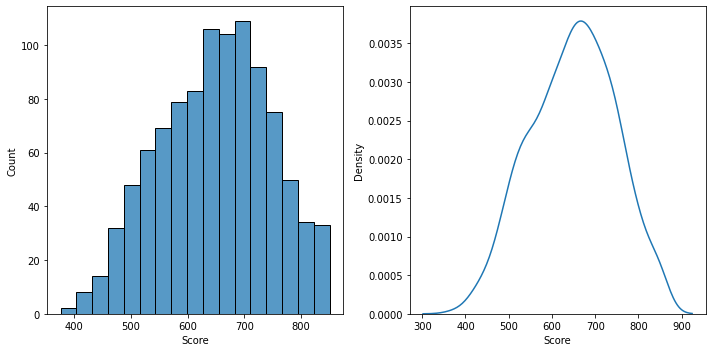

In [210]:
plt.figure()
plt.subplot(1,2,1)
sns.histplot(df['Score'])
plt.subplot(1,2,2)
sns.distplot(df['Score'],hist=False)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


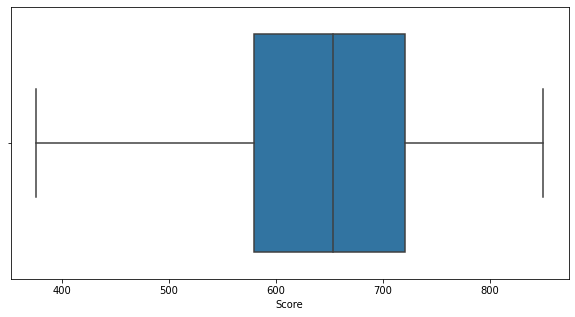

In [211]:
sns.boxplot(df['Score'])

Não há outliers nem outros claros indicadores de que existe um problema com os dados de 'Score'

#Gênero

In [212]:
df.groupby('Genero').size()

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

Vemos que existem mais de uma string relacionadas ao mesmo gênero

In [213]:
df.loc[df['Genero'].isin(['F','Fem']),'Genero'] = 'Feminino'

In [214]:
df.groupby('Genero').size()

Genero
Feminino     464
M              6
Masculino    521
dtype: int64

In [215]:
df.loc[df['Genero']=='M','Genero']='Masculino'

In [216]:
df.groupby('Genero').size()

Genero
Feminino     464
Masculino    527
dtype: int64

In [217]:
df['Genero'].fillna(value=sts.mode(df['Genero']),inplace=True)

In [218]:
df['Genero'].isna().sum()

0

#Estado

In [219]:
df.groupby('Estado').size()

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [220]:
df.loc[df['Estado']=='RP','Estado'] = 'PR'
df.loc[df['Estado'].isin(['SP','TD']),'Estado'] = 'RS'

In [221]:
df.groupby('Estado').size()

Estado
PR    258
RS    483
SC    258
dtype: int64

Text(0.5, 1.0, 'Clientes por estado')

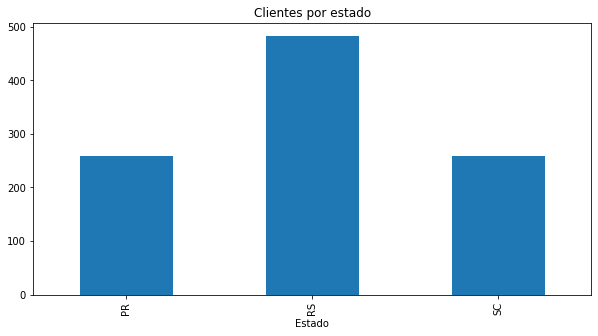

In [222]:
df.groupby('Estado').size().plot.bar().set_title('Clientes por estado')

#Idade

In [223]:
df['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Vemos que há indícios de problema com os valores em 'Idade'.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Idade')

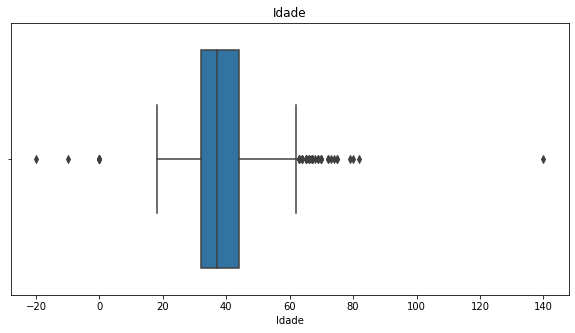

In [224]:
sns.boxplot(df['Idade']).set_title('Idade')

Consideremos que as idades válidas estejam entre 0 e 100 anos

In [225]:
medianaIdade = sts.median(df['Idade'].values)
print('Mediana das idades:',medianaIdade)

Mediana das idades: 37


In [226]:
df.loc[df['Idade'] > 100,'Idade'] = medianaIdade
df.loc[df['Idade'] < 0,'Idade'] = medianaIdade

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


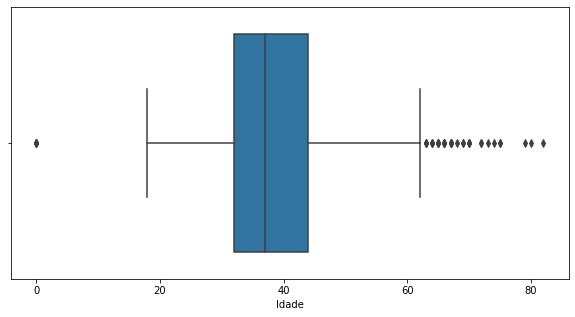

In [227]:
sns.boxplot(df['Idade'])

Text(0.5, 1.0, 'Idades')

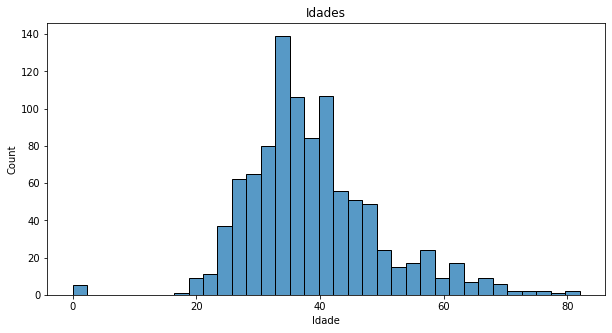

In [228]:
sns.histplot(df['Idade']).set_title('Idades')

#Patrimônio

In [229]:
df['Patrimonio'].value_counts()

2     110
9     110
8     108
1     104
3     103
5     100
7      95
6      94
4      87
10     50
0      38
Name: Patrimonio, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


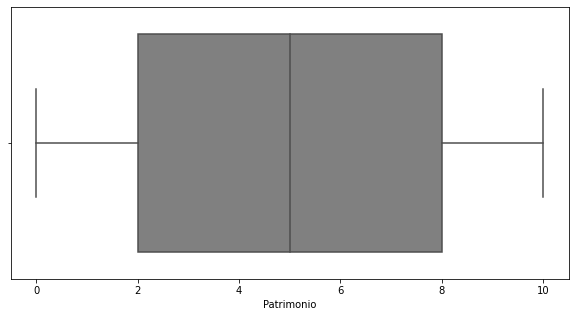

In [230]:
sns.boxplot(df['Patrimonio'],color='grey')

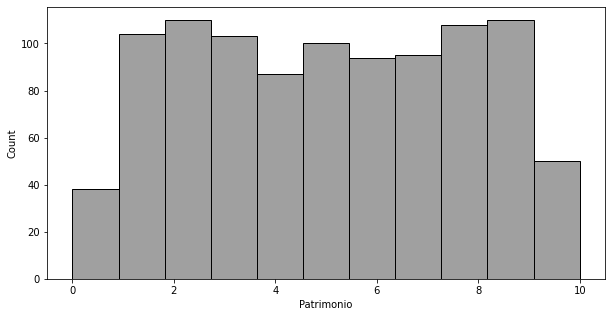

In [231]:
sns.histplot(df['Patrimonio'],color='grey')

#Saldo

In [232]:
df['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

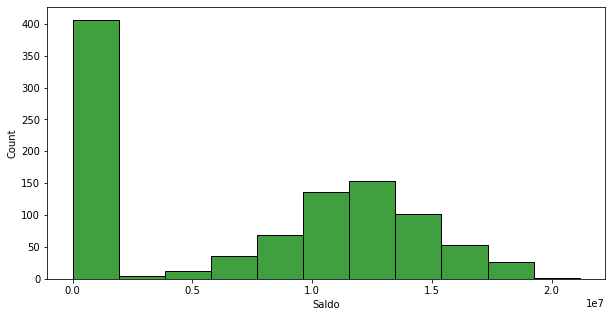

In [233]:
sns.histplot(df['Saldo'],color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


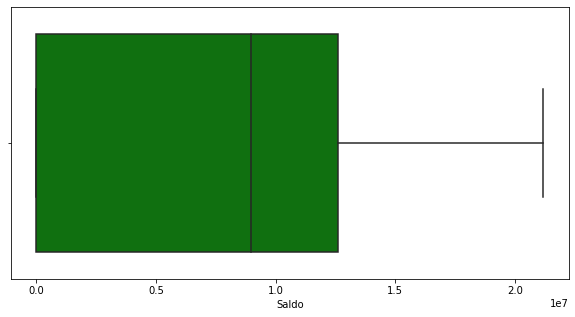

In [234]:
sns.boxplot(df['Saldo'],color='green')

Vemos que 'Saldo' parece normal, não há outliers. Apenas um cenário onde há muitos clientes com saldo = 0

#Produtos

In [235]:
df['Produtos'].describe()

count    999.000000
mean       1.526527
std        0.574201
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Produtos, dtype: float64

In [236]:
df.groupby('Produtos').size()

Produtos
1    511
2    452
3     34
4      2
dtype: int64

#Cartão de crédito

In [237]:
df.groupby('temCartCredito').size()

temCartCredito
0    297
1    702
dtype: int64

#Ativo

In [238]:
df.groupby('Ativo').size()

Ativo
0    490
1    509
dtype: int64

#Salario

In [239]:
df['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [240]:
df['Salario'].isna().sum()

7

In [241]:
medianaSalario = sts.median(df['Salario'].values)
print('Mediana de salários: ',medianaSalario)

Mediana de salários:  70518.0


In [242]:
df.loc[df['Salario'].isna()]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu
17,18,549,SC,Feminino,24,9,0,2,1,1,NaN,0
52,53,788,RS,Feminino,33,5,0,2,0,0,NaN,0
179,181,754,PR,Feminino,55,3,16160881,1,1,0,NaN,1
330,332,656,RS,Masculino,50,7,0,2,0,1,NaN,0
426,428,492,PR,Masculino,39,10,12457665,2,1,0,NaN,0
550,552,721,PR,Feminino,36,3,6525307,2,1,0,NaN,0
983,985,614,PR,Feminino,35,6,12810028,1,0,0,NaN,1


In [243]:
df['Salario'].fillna(medianaSalario,inplace=True)

In [244]:
df['Salario'].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


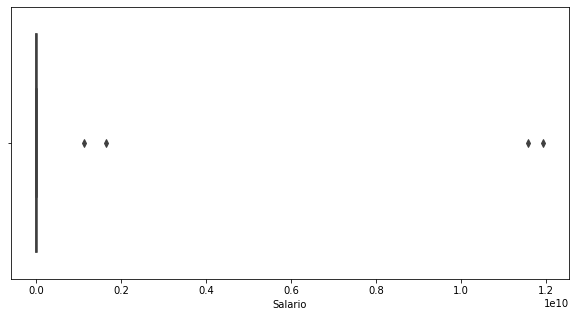

In [245]:
sns.boxplot(df['Salario'])

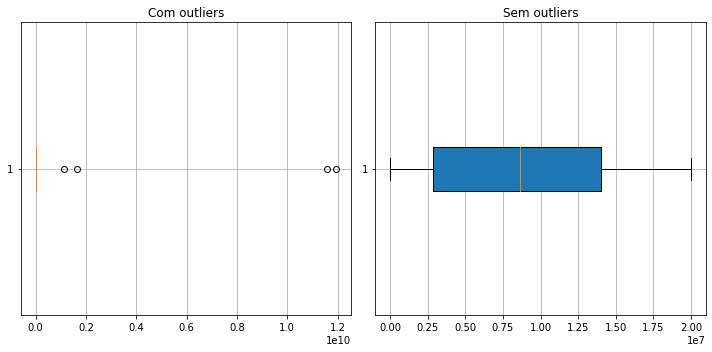

In [246]:
plt.rcParams['figure.figsize'] = (10,5)
plt.figure()
plt.subplot(1,2,1)
plt.boxplot(df['Salario'],patch_artist=True,vert=False)
plt.title('Com outliers')
plt.grid()
plt.subplot(1,2,2)
plt.boxplot(df.Salario,patch_artist=True,vert=False,showfliers=False)
plt.title('Sem outliers')
plt.grid()
plt.tight_layout()
plt.show()

Vamos buscar por estes OUTLIERS 

In [247]:
Q1 = df['Salario'].quantile(0.25)
Q3 = df['Salario'].quantile(0.75)

intervalQT = Q3-Q1

print('distância interquartil: ',intervalQT)

distância interquartil:  11173055.0


In [248]:
df[df['Salario'] > Q3 + (1.5*intervalQT)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [249]:
df.loc[df['Salario'] > Q3 + (1.5*intervalQT),'Salario'] = medianaSalario

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


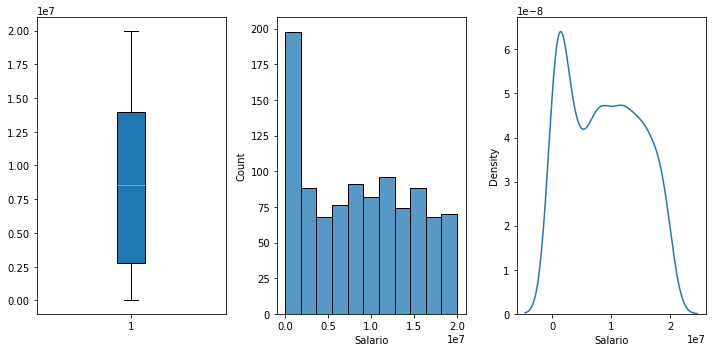

In [250]:
plt.figure()
plt.subplot(1,3,1)
plt.boxplot(df.Salario,patch_artist=True,vert=True,showfliers=True)
plt.subplot(1,3,2)
sns.histplot(df.Salario)
plt.subplot(1,3,3)
sns.distplot(df.Salario,hist=False)
plt.tight_layout()
plt.show()

In [251]:
df['Salario'].describe()

count    9.990000e+02
mean     8.756344e+06
std      6.093884e+06
min      9.677000e+03
25%      2.779068e+06
50%      8.574652e+06
75%      1.395180e+07
max      1.997254e+07
Name: Salario, dtype: float64

In [252]:
df.isna().sum()

ID                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
temCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

#Correlação entre atributos

In [253]:
df.corr()

,ID,Score,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu
ID,1.000000,0.021888,0.047915,-0.013243,0.067955,-0.029920,-0.006245,0.026930,-0.069300,-0.007278
Score,0.021888,1.000000,-0.026118,-0.007836,0.058406,-0.001722,0.002021,0.038565,0.028688,-0.067101
Idade,0.047915,-0.026118,1.000000,-0.049366,-0.010133,-0.056975,-0.022079,0.113175,0.003430,0.275774
Patrimonio,-0.013243,-0.007836,-0.049366,1.000000,-0.056970,0.064772,0.043793,-0.056902,0.015155,-0.058677
Saldo,0.067955,0.058406,-0.010133,-0.056970,1.000000,-0.275056,0.031670,-0.011121,-0.020422,0.108791
Produtos,-0.029920,-0.001722,-0.056975,0.064772,-0.275056,1.000000,-0.006188,0.027905,0.043611,-0.055851
temCartCredito,-0.006245,0.002021,-0.022079,0.043793,0.031670,-0.006188,1.000000,-0.020484,-0.087979,0.001912
Ativo,0.026930,0.038565,0.113175,-0.056902,-0.011121,0.027905,-0.020484,1.000000,0.032944,-0.211145
Salario,-0.069300,0.028688,0.003430,0.015155,-0.020422,0.043611,-0.087979,0.032944,1.000000,0.002409
Saiu,-0.007278,-0.067101,0.275774,-0.058677,0.108791,-0.055851,0.001912,-0.211145,0.002409,1.000000


Não vemos indícios de correlação forte ou moderada entre dois atributos.